## Load Needed Packages


In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error
import ipywidgets as widgets
from IPython.display import display

In [ ]:
# Display the full table
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

In [20]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.max_colwidth')

In [22]:
df = pd.read_csv("Dataset/bankloan.csv")
df.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [27]:
df.describe()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## checking Unique Values

In [28]:
df["CreditCard"].unique()

array([0, 1])

In [44]:
df.sample(n=10) 

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
526,527,26,2,205,93106,1,6.33,1,271,0,0,0,0,1
676,677,47,23,11,94063,1,0.90,3,103,0,0,0,0,1
3584,3585,63,37,15,92121,1,0.80,2,115,0,0,0,1,0
700,701,37,11,84,90089,2,1.80,1,0,0,0,0,1,1
4411,4412,23,-2,75,90291,2,1.80,2,0,0,0,0,1,1
3169,3170,52,28,55,94608,1,1.60,2,227,0,0,0,0,0
2847,2848,44,18,21,90840,1,0.20,1,0,0,0,0,1,0
3331,3332,67,42,21,94607,3,0.10,3,0,0,0,0,0,1
1657,1658,31,5,28,94538,3,1.00,1,0,0,0,0,1,0
1454,1455,51,25,148,90024,1,1.00,1,0,0,0,0,0,0


In [46]:
df_copy = df.copy()

### Drop unnecessary columns (ID, ZIP.Code)

In [48]:

df = df.drop(['ID', 'ZIP.Code'], axis=1)

### Check for missing values

In [49]:
print(data.isnull().sum())

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
dtype: int64


### Fix negative experience (if any)
### Check unique values in categorical columns

In [50]:
df['Experience'] = df['Experience'].apply(lambda x: 0 if x < 0 else x)
print(df[['Education', 'Securities.Account', 'CD.Account', 'Online', 'CreditCard']].nunique())

Education             3
Securities.Account    2
CD.Account            2
Online                2
CreditCard            2
dtype: int64


## Exploratory Data Analysis (EDA) with Seaborn

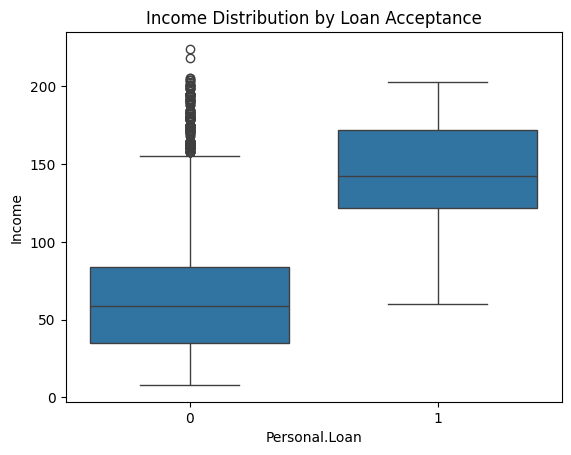

In [55]:
# Distribution of Income vs. Personal Loan
sns.boxplot(x="Personal.Loan", y="Income", data=df)
plt.title("Income Distribution by Loan Acceptance")
plt.show()

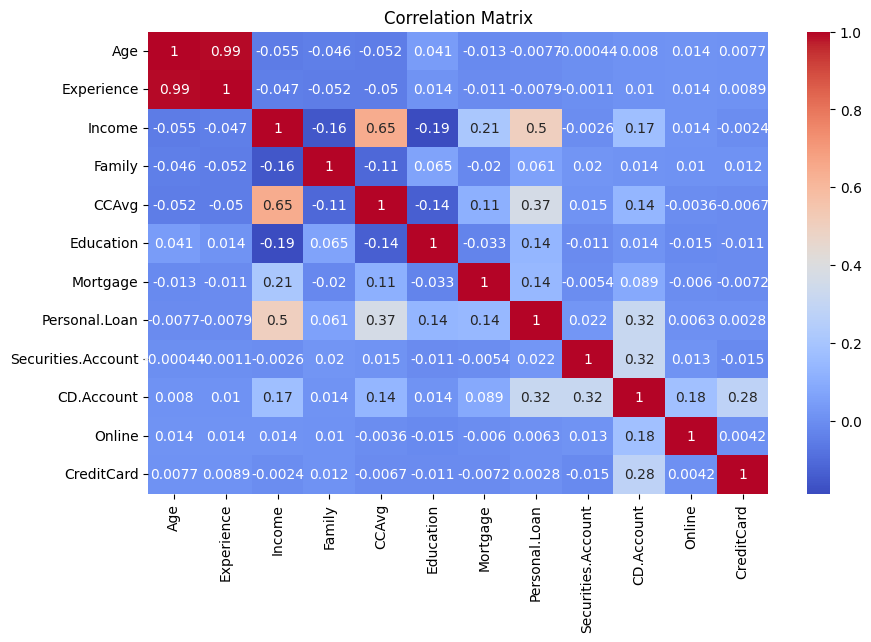

In [56]:
# Correlation Heatmap

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

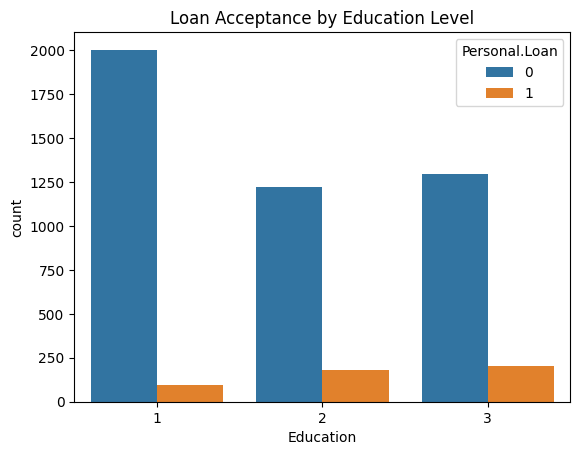

In [57]:
# Count of Loans by Education Level

sns.countplot(x="Education", hue="Personal.Loan", data=data)
plt.title("Loan Acceptance by Education Level")
plt.show()

## Logistic Regression Model

In [72]:
# Train-Test Split

X = df.drop('Personal.Loan', axis=1)
y = df['Personal.Loan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [73]:
# Model Training

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

d:\Manikandan\E - Manikandan\Python\.env-3.10\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [75]:
# Model Evaluation

print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.99      0.98       446
           1       0.88      0.70      0.78        54

    accuracy                           0.96       500
   macro avg       0.92      0.85      0.88       500
weighted avg       0.96      0.96      0.96       500

Confusion Matrix:
 [[441   5]
 [ 16  38]]


## Interactive Logistic Regression Prediction with Widgets

### Create Interactive Widgets

In [ ]:
# Define widget options
education_options = [(str(i), i) for i in sorted(data['Education'].unique())]
family_options = [(str(i), i) for i in sorted(data['Family'].unique())]

# Create widgets
age_slider = widgets.IntSlider(min=18, max=90, step=1, value=30, description="Age:")
experience_slider = widgets.IntSlider(min=0, max=50, step=1, value=5, description="Experience:")
income_slider = widgets.FloatSlider(min=0, max=300, step=5, value=50, description="Income:")
family_slider = widgets.IntSlider(min=1, max=4, step=1, value=2, description="Family:")
ccavg_slider = widgets.FloatSlider(min=0, max=10, step=0.1, value=2.0, description="CCAvg:")
education_dropdown = widgets.Dropdown(options=education_options, value=1, description="Education:")
mortgage_slider = widgets.IntSlider(min=0, max=500, step=10, value=0, description="Mortgage:")
securities_dropdown = widgets.Dropdown(options=[("No",0), ("Yes",1)], value=0, description="Securities Account:")
cd_dropdown = widgets.Dropdown(options=[("No",0), ("Yes",1)], value=0, description="CD Account:")
online_dropdown = widgets.Dropdown(options=[("No",0), ("Yes",1)], value=1, description="Online:")
creditcard_dropdown = widgets.Dropdown(options=[("No",0), ("Yes",1)], value=0, description="CreditCard:")

## Prediction Function

In [66]:
def predict_loan(
    Age, Experience, Income, Family, CCAvg, Education, 
    Mortgage, Securities_Account, CD_Account, Online, CreditCard
):
    # Create input array
    input_data = np.array([[
        Age, Experience, Income, Family, CCAvg, Education,
        Mortgage, Securities_Account, CD_Account, Online, CreditCard
    ]])
    
    # Predict probability
    proba = model.predict_proba(input_data)[0][1]
    prediction = model.predict(input_data)[0]
    
    # Display result
    print(f"\nPredicted Probability of Loan Approval: {proba:.2%}")
    if prediction == 1:
        print("✅ Prediction: **APPROVED**")
    else:
        print("❌ Prediction: **REJECTED**")
    
    # Plot probability
    plt.figure(figsize=(6, 2))
    sns.barplot(x=[proba], y=["Loan Approval Chance"], palette=["green" if prediction == 1 else "red"])
    plt.xlim(0, 1)
    plt.title("Loan Approval Probability")
    plt.show()

## Interactive Dashboard

In [ ]:
widgets.interact(
    predict_loan,
    Age=age_slider,
    Experience=experience_slider,
    Income=income_slider,
    Family=family_slider,
    CCAvg=ccavg_slider,
    Education=education_dropdown,
    Mortgage=mortgage_slider,
    Securities_Account=securities_dropdown,
    CD_Account=cd_dropdown,
    Online=online_dropdown,
    CreditCard=creditcard_dropdown
)

interactive(children=(IntSlider(value=41, description='Age:', max=90, min=18), IntSlider(value=15, description…

<function __main__.predict_loan(Age, Experience, Income, Family, CCAvg, Education, Mortgage, Securities_Account, CD_Account, Online, CreditCard)>